In [1]:
#import starements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def print_data(data, training, test):
    print("Total Data:")
    print(data)
    print ("\nTraining data:")
    print(training)
    print("\nTest Data:")
    print(test)

    #https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    x1 = training.T[0]
    x2 = training.T[1]
    y = training.T[2]
    labels = training.T[3]

    # Create point (1,3,4) on figure 
    ax1.scatter(x1,x2, y, c=labels, cmap='brg', marker='+')

    x1 = test.T[0]
    x2 = test.T[1]
    y = test.T[2]
    labels = test.T[3]
    
    ax1.scatter(x1,x2, y, c=labels, cmap='brg', marker='o')
    plt.show()

In [3]:
def generate_data(TOTAL_SAMPLE_SIZE,n,d,m,s):

    label_names = ["good", "bad", "ugly"]
    
    #generating the total sample set
    rng = np.random.default_rng(seed = 42)
    total_sample_set = rng.normal(m, s, d*TOTAL_SAMPLE_SIZE).reshape(TOTAL_SAMPLE_SIZE, d)
    
    labels = np.random.randint(0, len(label_names), TOTAL_SAMPLE_SIZE)
    
    # appends the lables to the end of each of the data set
    complete_data = np.concatenate((total_sample_set, labels.T.reshape(labels.shape[0], 1)), axis=1)
    
    return complete_data

def separate_test_and_train_data(data, n):
    training_ind = np.random.choice(np.arange(len(data)), n, replace=False) #get random indicies for training data
    test_ind = np.setdiff1d(np.arange(len(data)), training_ind) #get the indicies not chosen
    
    training = data[training_ind]
    test = data[test_ind]
    
    return training, test

In [4]:
def weigh(distance):
    return 1/(distance + 0.0001)

def distances(train, point):
    return np.linalg.norm((train - point), axis=1)

def vote(distances, kclasses, k):
    labels = ["good", "bad", "ugly"]
    
    votes = np.zeros(len(labels), dtype=np.float32)
    
    weight = np.vectorize(weigh)
    
    w = weight(distances)
    
    votes = [np.sum(w[kclasses == 0]), np.sum(w[kclasses == 1]), np.sum(w[kclasses == 2])]
    
    return labels[np.argmax(votes)] #get the winner

def kneighbors(train, test, k):
    classes = []
    for point in test:
        dists = distances(train, point)      #1.Find its Euclidean distance from each of the n points in the training data set 
        smallestK = np.argsort(dists)[:k]    #2.Pick the nearest K points (returns the indicies)
        classes.append(vote(dists[smallestK], train[smallestK].T[len(train.T) - 1].astype(int), k)) #3.Output the class by weighted voting using the K nearest neighbors in the above step 

    return classes
    
    

['bad', 'ugly', 'ugly']
Total Data:
[[5.60943416 2.92003179 6.50090239 0.        ]
 [6.88112943 1.09792962 2.39564099 2.        ]
 [5.25568081 4.36751482 4.96639768 1.        ]
 [3.29391214 6.75879595 6.55558387 2.        ]
 [5.1320614  7.25448241 5.93501868 0.        ]
 [3.28141507 5.73750157 3.0822348  0.        ]
 [6.7569006  4.90014818 4.63027527 1.        ]
 [3.63814091 7.44508268 4.69094104 2.        ]
 [4.14334436 4.2957329  6.06461837 2.        ]
 [5.73088813 5.82546522 5.86164201 2.        ]]

Training data:
[[5.1320614  7.25448241 5.93501868 0.        ]
 [5.60943416 2.92003179 6.50090239 0.        ]
 [6.88112943 1.09792962 2.39564099 2.        ]
 [3.28141507 5.73750157 3.0822348  0.        ]
 [5.25568081 4.36751482 4.96639768 1.        ]
 [3.29391214 6.75879595 6.55558387 2.        ]
 [5.73088813 5.82546522 5.86164201 2.        ]]

Test Data:
[[6.7569006  4.90014818 4.63027527 1.        ]
 [3.63814091 7.44508268 4.69094104 2.        ]
 [4.14334436 4.2957329  6.06461837 2.    

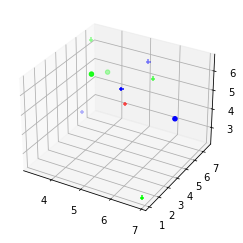

In [5]:
'''Number of samples (data points or vectors) in the training set: n 
• Total number of samples (data points or vectors) in the training set plus test set: 
TOTAL_SAMPLE_SIZE 
• Number of features: d 
• Stipulated number of nearest neighbors: K 
• Mean and standard deviation of the normal distribution: m and s, respectively 
• Data structure(s) (typically ndarray) holding all the training data and the corresponding labels: 
X_train, y_train   
• Data structure(s) (typically ndarray) holding all the test data and the corresponding labels: 
X_test, y_test '''

TOTAL_SAMPLE_SIZE = 10 # Total number of samples (data points or vectors) in the training set plus test set
n = 7 #Number of samples (data points or vectors) in the training set
d = 3 #Number of features
K = 3 #Stipulated number of nearest neighbors
m = 5 #mean of normal distribution
s = 2 #std of normal distrubution

data = generate_data(TOTAL_SAMPLE_SIZE, n, d, m, s)

training, test = separate_test_and_train_data(data, n)

print(kneighbors(training, test, K))

print_data(data, training, test)